# **Bank Churn Customer Analysis**: Data Preparation & EDA (Exploratory Data Analysis)

|| **Cleaning and Exploring Bank Churn Customer Data to Prepare it for Machine Learning Models including Classification (Supervised) & Clustering (Unsupervised)** ||

## **The Situation**

You've been hired as a Data Scientist/Data Analyst for a Bank.

The product team at the bank has notices an **uptick in Customer Churn** and a decline in growth, and they want to find ways to reduce churn and appeal to new customers.

You've been asked to prepare and explore a set of customer data that wil be used for two Machine Learning Projects: **Churn Prediction** & **Customer Segmentation**.

## **Objective 1: Importing & QA the Data**

Our first objective is to Import & Join two customer Data Tables, then Remove Duplicate Rows & Columns and Fill in Missing Values.

In [43]:
# Importing the Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# First, make sure your Google Drive is mounted in Colab:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# churn_cust_info = pd.read_excel("Bank_Churn_Messy.xlsx")
churn_cust_info = pd.read_excel("/content/drive/MyDrive/Data Analytics & BI Career Path/Batch 2/Python/Bank Churn Customer Project/Bank_Churn_Messy.xlsx")

churn_cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [46]:
churn_cust_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


In [47]:
churn_acct_info = pd.read_excel("/content/drive/MyDrive/Data Analytics & BI Career Path/Batch 2/Python/Bank Churn Customer Project/Bank_Churn_Messy.xlsx", sheet_name = 1)

churn_acct_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [48]:
churn_acct_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10002 non-null  int64 
 1   Balance         10002 non-null  object
 2   NumOfProducts   10002 non-null  int64 
 3   HasCrCard       10002 non-null  object
 4   Tenure          10002 non-null  int64 
 5   IsActiveMember  10002 non-null  object
 6   Exited          10002 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.1+ KB


Here, the "**Exited**" variable will be our variable of interest; response variable for the Classification Model.

In [49]:
churn_df = churn_cust_info.merge(churn_acct_info, how = "left", on = "CustomerId")

#Suppose, in the "churn_acct_info" dataset the "CustomerId" is named differently, say, "CustID"
#churn_df = churn_cust_info.merge(churn_acct_info, how="left", left_on="CustomerId", right_on="CustID")

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


*Check for Duplicate Rows and Duplicate Columns*

In [50]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [51]:
churn_df = churn_df.drop("Tenure_y", axis = 1).rename({"Tenure_x":"Tenure"}, axis = 1)

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0


In [52]:
churn_df.duplicated(keep= False)

,0
0,True
1,True
2,False
3,False
4,False
...,...
9999,False
10000,True
10001,True
10002,True


In [53]:
churn_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0


In [54]:
churn_df = churn_df.drop_duplicates()

#To drop duplicates based only on the CustomerId column:
#churn_df = churn_df.drop_duplicates(subset="CustomerId")
#If I want to take the combination of CustomerId and Surname
#churn_df = churn_df.drop_duplicates(subset=["CustomerId", "Surname"])

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


## **Objective 2: Data Cleaning**

Our Second Objective is to Clean the Data by fixing inconsistencies in labeling, handling erroneous values, and fixing currency fields.

In [55]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [56]:
# churn_df["EstimatedSalary"].str.strip("€").astype("float")
# Here, strip won't work as it only strip at the beginning and end. The negative sign creates a problem here.

churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].str.replace("€", "").astype("float")

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


<ipython-input-56-bc528ef4da2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].str.replace("€", "").astype("float")


In [57]:
churn_df["Balance"] = churn_df["Balance"].str.replace("€", "").astype("float")

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


<ipython-input-57-db3224cfb408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df["Balance"] = churn_df["Balance"].str.replace("€", "").astype("float")


In [58]:
# Count the number of Missing Values in each Column
missing_values_count = churn_df.isnull().sum()

# Total number of missing values in the DataFrame
total_missing = missing_values_count.sum()

print(f"Total missing values in the DataFrame: {total_missing}")
missing_values_count

Total missing values in the DataFrame: 6


,0
CustomerId,0
Surname,3
CreditScore,0
Geography,0
Gender,0
Age,3
Tenure,0
EstimatedSalary,0
Balance,0
NumOfProducts,0


In [59]:
churn_df[churn_df.isna().any(axis=1) == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [60]:
churn_df = churn_df.fillna(value = {"Surname":"Missing", "Age": churn_df["Age"].median()})

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [61]:
churn_df.iloc[[28, 121, 9389]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,Missing,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,Missing,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,Missing,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


In [62]:
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,99762.195289,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,60583.863580,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [63]:
churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].replace(-999999, churn_df["EstimatedSalary"].median())

churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [64]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [65]:
churn_df["Geography"].value_counts()

,count
Geography,
Germany,2509
Spain,2477
France,1741
French,1655
FRA,1618


In [66]:
churn_df["Geography"] = np.where(churn_df["Geography"].isin(["FRA", "France", "French"]), "France", churn_df["Geography"])

churn_df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


## **Wrapping up the Data Cleaning Steps in a Single Block of Code**

In [67]:
#Importing the Required Libraries   if not loaded yet
import pandas as pd
import numpy as np

churn_df = (
    pd.read_excel("/content/drive/MyDrive/Data Analytics & BI Career Path/Batch 2/Python/Bank Churn Customer Project/Bank_Churn_Messy.xlsx")
    .merge(pd.read_excel("/content/drive/MyDrive/Data Analytics & BI Career Path/Batch 2/Python/Bank Churn Customer Project/Bank_Churn_Messy.xlsx", sheet_name=1), how = "left", on = "CustomerId")
    .drop_duplicates()
    .drop("Tenure_y", axis = 1)
    .rename({"Tenure_x": "Tenure"}, axis = 1)
    .assign(
        EstimatedSalary = lambda x: x["EstimatedSalary"].str.replace("€", "").astype("float"),
        Balance = lambda x: x["Balance"].str.replace("€", "").astype("float"),
        Geography = lambda x: np.where(x["Geography"].isin(["FRA", "France", "French"]), "France", x["Geography"])
    )
    .assign(EstimatedSalary = lambda x: x["EstimatedSalary"].replace(-999999, x["EstimatedSalary"].median()))
)

churn_df = churn_df.fillna(value = {"Surname": "Missing", "Age": churn_df["Age"].median()})

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


## **Objective 3: Exploring the Data**


Our third objective is to explore the target variable (Exited) and look at feature-target relationships for categorical and numeric fields:

* Building a bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0).

* Exploring the categorical variables vs. the target, and look at the percentage of Churners by “Geography” and “Gender”.

* Building box plots for each numeric field, broken out by churners vs. non-churners.

* Building histograms for each numeric field, broken out by churners vs. non-churners.

<Axes: xlabel='Exited'>

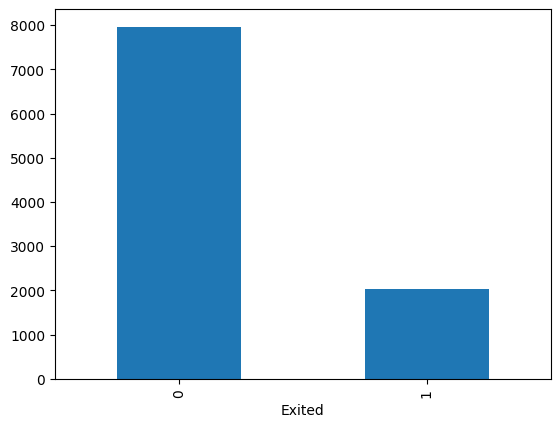

In [68]:
churn_df["Exited"].value_counts().plot.bar()

<Axes: xlabel='Exited'>

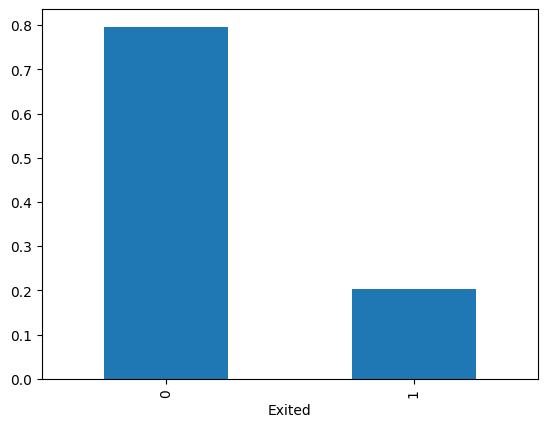

In [69]:
churn_df["Exited"].value_counts(normalize = True).plot.bar() #To see it in percentage

<Axes: xlabel='Geography', ylabel='Exited'>

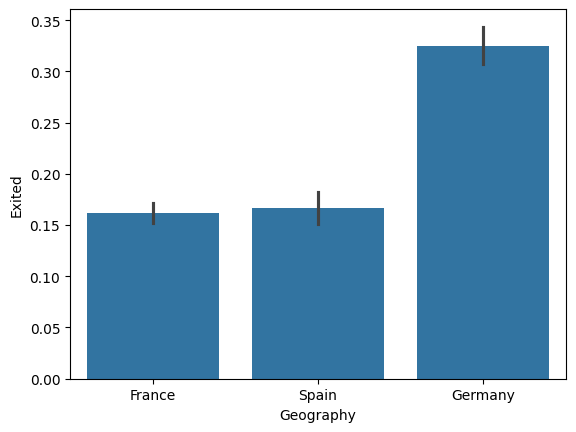

In [70]:
import seaborn as sns

sns.barplot(data = churn_df, x="Geography", y = "Exited")

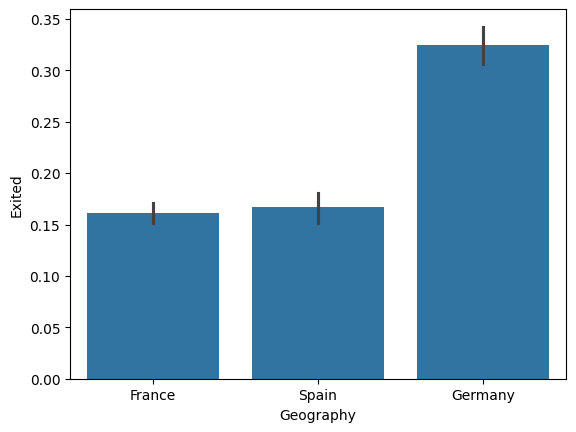

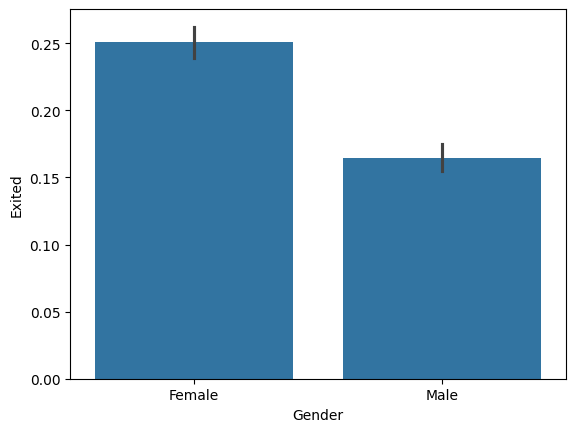

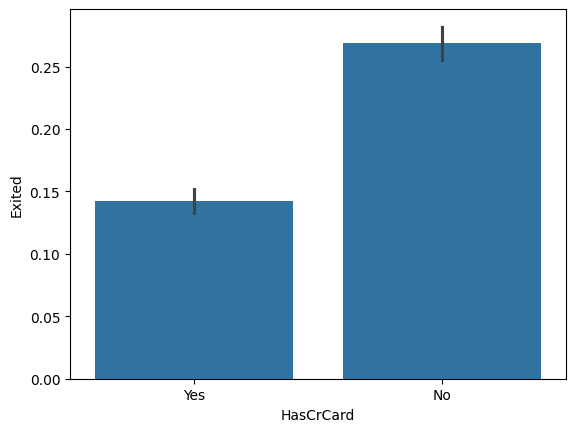

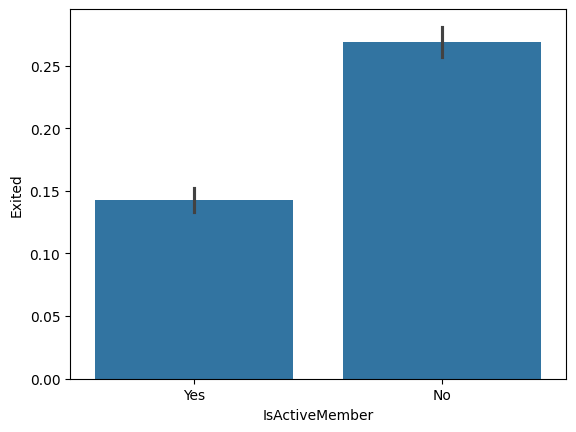

In [71]:
import matplotlib.pyplot as plt

for col in churn_df.drop("Surname", axis = 1).select_dtypes("object"):
  sns.barplot(data=churn_df, x = col, y= "Exited")
  plt.show()

<Axes: ylabel='Age'>

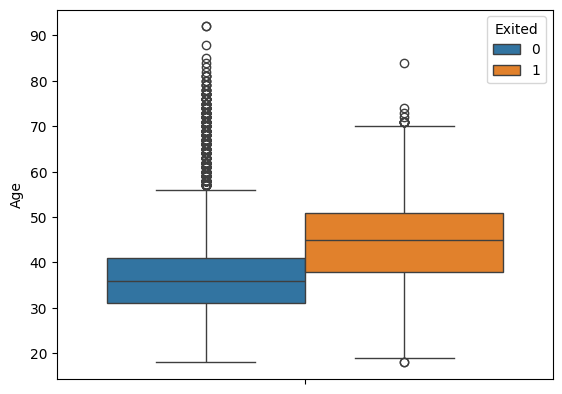

In [72]:
sns.boxplot(data = churn_df, y = "Age", hue = "Exited")

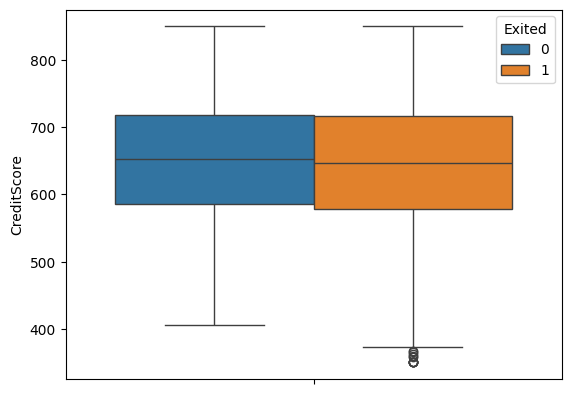

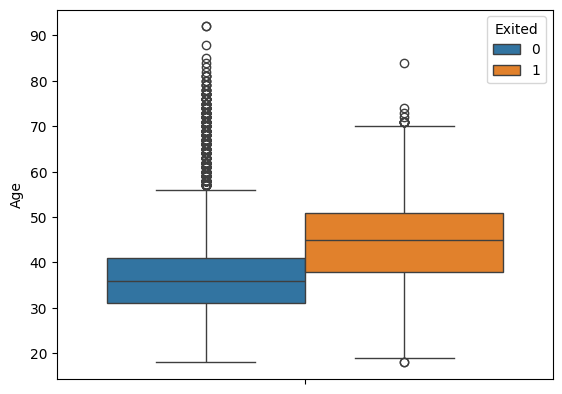

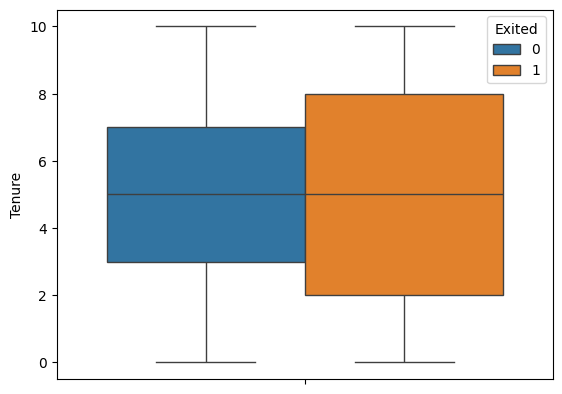

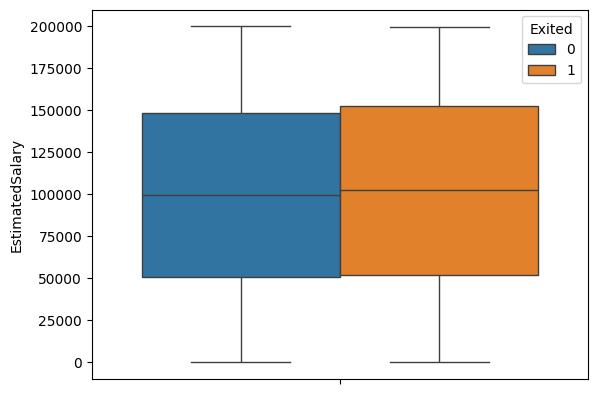

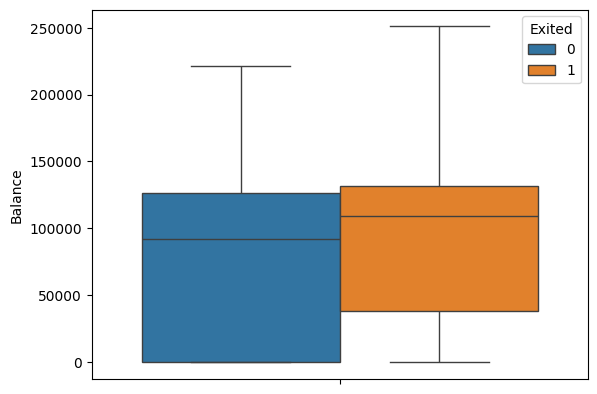

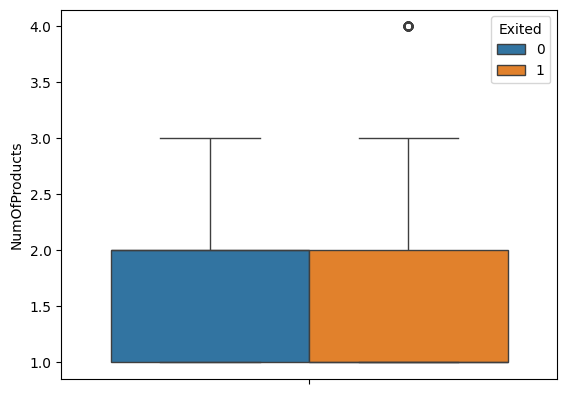

In [73]:
for col in churn_df.drop(["CustomerId", "Exited"], axis = 1).select_dtypes("number"):
  sns.boxplot(data=churn_df, y = col, hue= "Exited")
  plt.show()

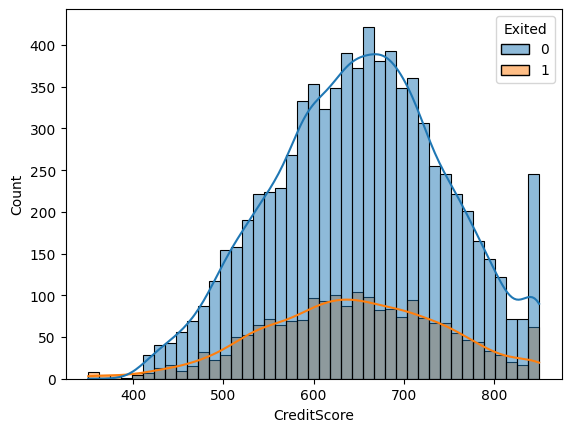

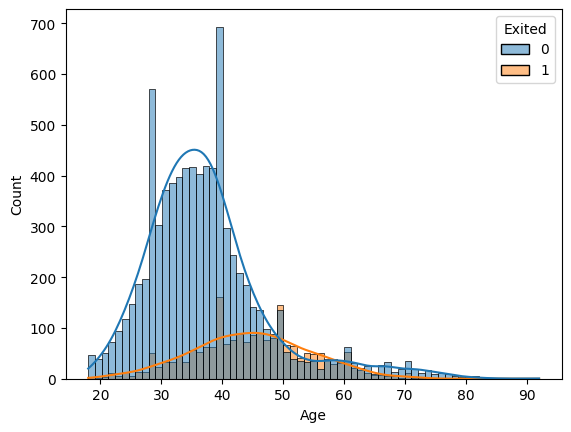

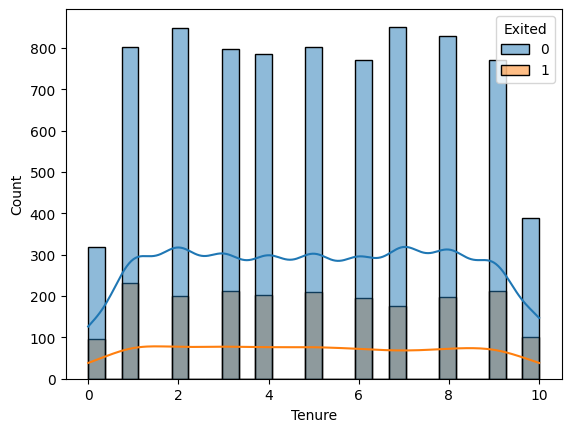

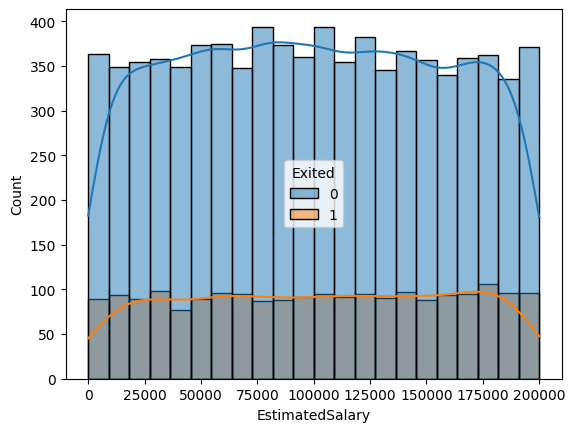

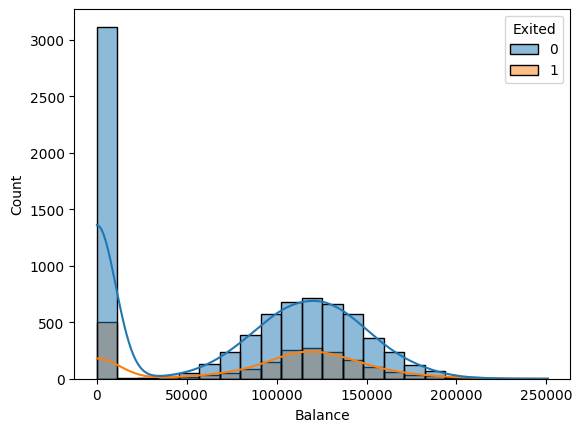

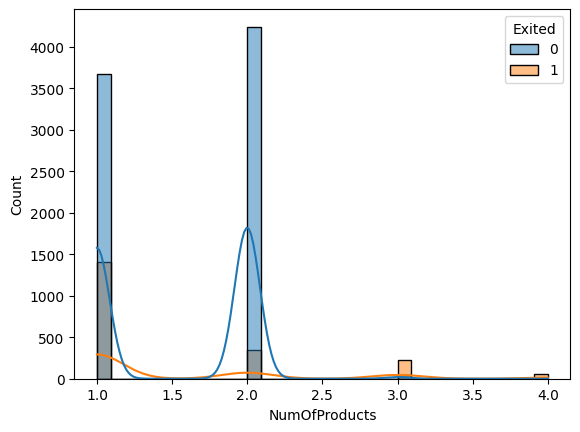

In [74]:
for col in churn_df.drop(["CustomerId", "Exited"], axis = 1).select_dtypes("number"):
  sns.histplot(data=churn_df, x = col, hue= "Exited", kde = True)
  plt.show()

## **Objective 4: Preparing the Data for Modelling**

Our final objective is to prepare the data for modeling through feature selection, feature engineering, and data splitting:

* Creating a new dataset that excludes any columns that aren’t be suitable for modeling.

* Creating **Dummy Variables** for categorical fields.

* Create a new “balance_v_income” feature, which divides a customer’s bank balance by their estimated salary, then visualize that feature vs. churn status.


In [75]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [76]:
modelling_df = churn_df.drop(["CustomerId", "Surname"], axis = 1)

modelling_df

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39.0,5,96270.64,0.00,2,No,No,0
9997,516,France,Male,35.0,10,101699.77,57369.61,1,Yes,Yes,0
9998,709,France,Female,36.0,7,42085.58,0.00,1,Yes,Yes,1
9999,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,No,1


In [77]:
modelling_df = pd.get_dummies(modelling_df, drop_first = True, dtype = "int")

modelling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42.0,2,101348.88,0.00,1,1,0,0,0,1,1
2,608,41.0,1,112542.58,83807.86,1,0,0,1,0,1,1
3,502,42.0,8,113931.57,159660.80,3,1,0,0,0,0,0
4,699,39.0,1,93826.63,0.00,2,0,0,0,0,0,0
5,850,43.0,2,79084.10,125510.82,1,0,0,1,0,1,1


In [78]:
modelling_df["Balance_v_Sal"] = modelling_df["Balance"] / modelling_df["EstimatedSalary"]

modelling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_Sal
0,619,42.0,2,101348.88,0.00,1,1,0,0,0,1,1,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,0,1,0,1,1,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,0,0,0,0,0,1.401375
4,699,39.0,1,93826.63,0.00,2,0,0,0,0,0,0,0.000000
5,850,43.0,2,79084.10,125510.82,1,0,0,1,0,1,1,1.587055


<Axes: ylabel='Balance_v_Sal'>

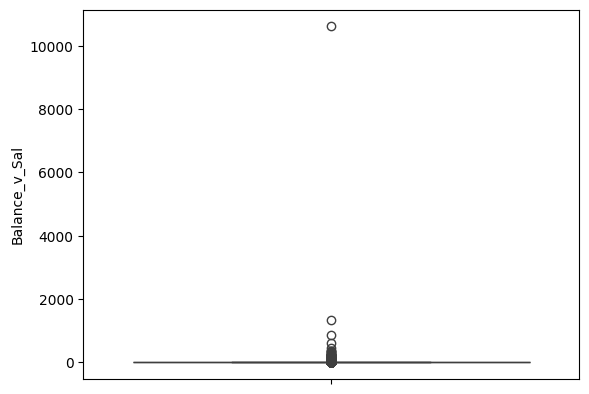

In [79]:
sns.boxplot(data = modelling_df, y = "Balance_v_Sal")

In [80]:
modelling_df.describe()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_Sal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700,0.250900,0.247700,0.545700,0.515100,0.515100,3.878703
std,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769,0.433553,0.431698,0.497932,0.499797,0.499797,108.337260
min,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.747002
75%,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.514022
max,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10614.655440


<Axes: ylabel='Balance_v_Sal'>

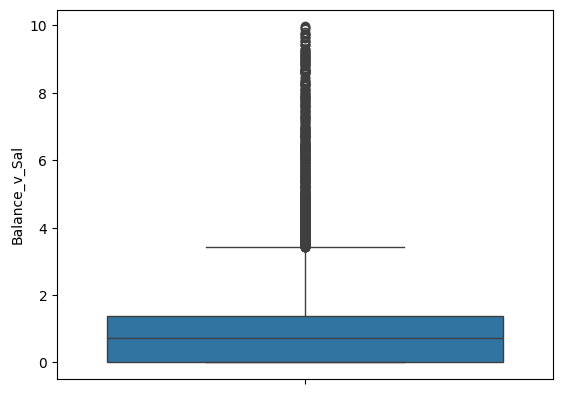

In [81]:
sns.boxplot(data = modelling_df.query("Balance_v_Sal < 10"), y = "Balance_v_Sal")

<Axes: ylabel='Balance_v_Sal'>

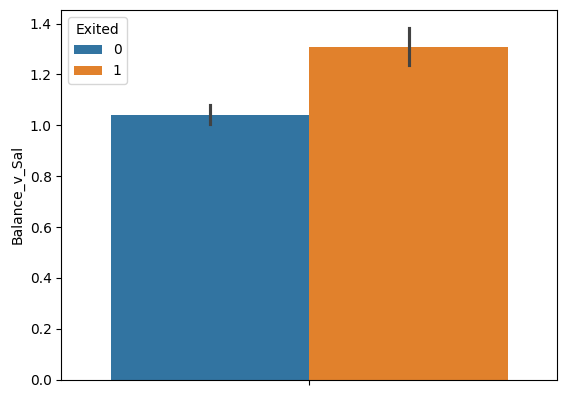

In [82]:
sns.barplot(data = modelling_df.query("Balance_v_Sal < 10"), y = "Balance_v_Sal", hue = "Exited")

**Now, by Applying Machine Learning Algorithms we will identify which variables have impact on our Target Variable (Exited).**

Before, that let's save the "modelling_df" dataframe in our Google Drive as a CSV file for further use.

In [83]:
# Specify the path in your Google Drive
# file_path = '/content/drive/MyDrive/Data Analytics & BI Career Path/Batch 2/Python/Bank Churn Customer Project/modelling_df.csv'

# # Save the DataFrame as a CSV file
# modelling_df.to_csv(file_path, index=False)  # Set index=False to avoid saving the index as a column

# print(f"File saved to {file_path}")

# **Bank Churn Customer Analysis**: Classification

|| **Building a Classification Model to Predict which bank customers are most likely to Churn** ||

## **Objective 1: Checking Multicollinearity of the Data**

In [84]:
# Suppose it's a different Session and you need to load the saved "modelling_df" data again
# import pandas as pd
# modelling_df = pd.read_csv("/content/drive/MyDrive/Data Analytics & BI Career Path/Batch 2/Python/Bank Churn Customer Project/modelling_df.csv")

# modelling_df.head()

In [87]:
#Let's First Inspect Our Dataframe
modelling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_Sal
0,619,42.0,2,101348.88,0.00,1,1,0,0,0,1,1,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,0,1,0,1,1,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,0,0,0,0,0,1.401375
4,699,39.0,1,93826.63,0.00,2,0,0,0,0,0,0,0.000000
5,850,43.0,2,79084.10,125510.82,1,0,0,1,0,1,1,1.587055


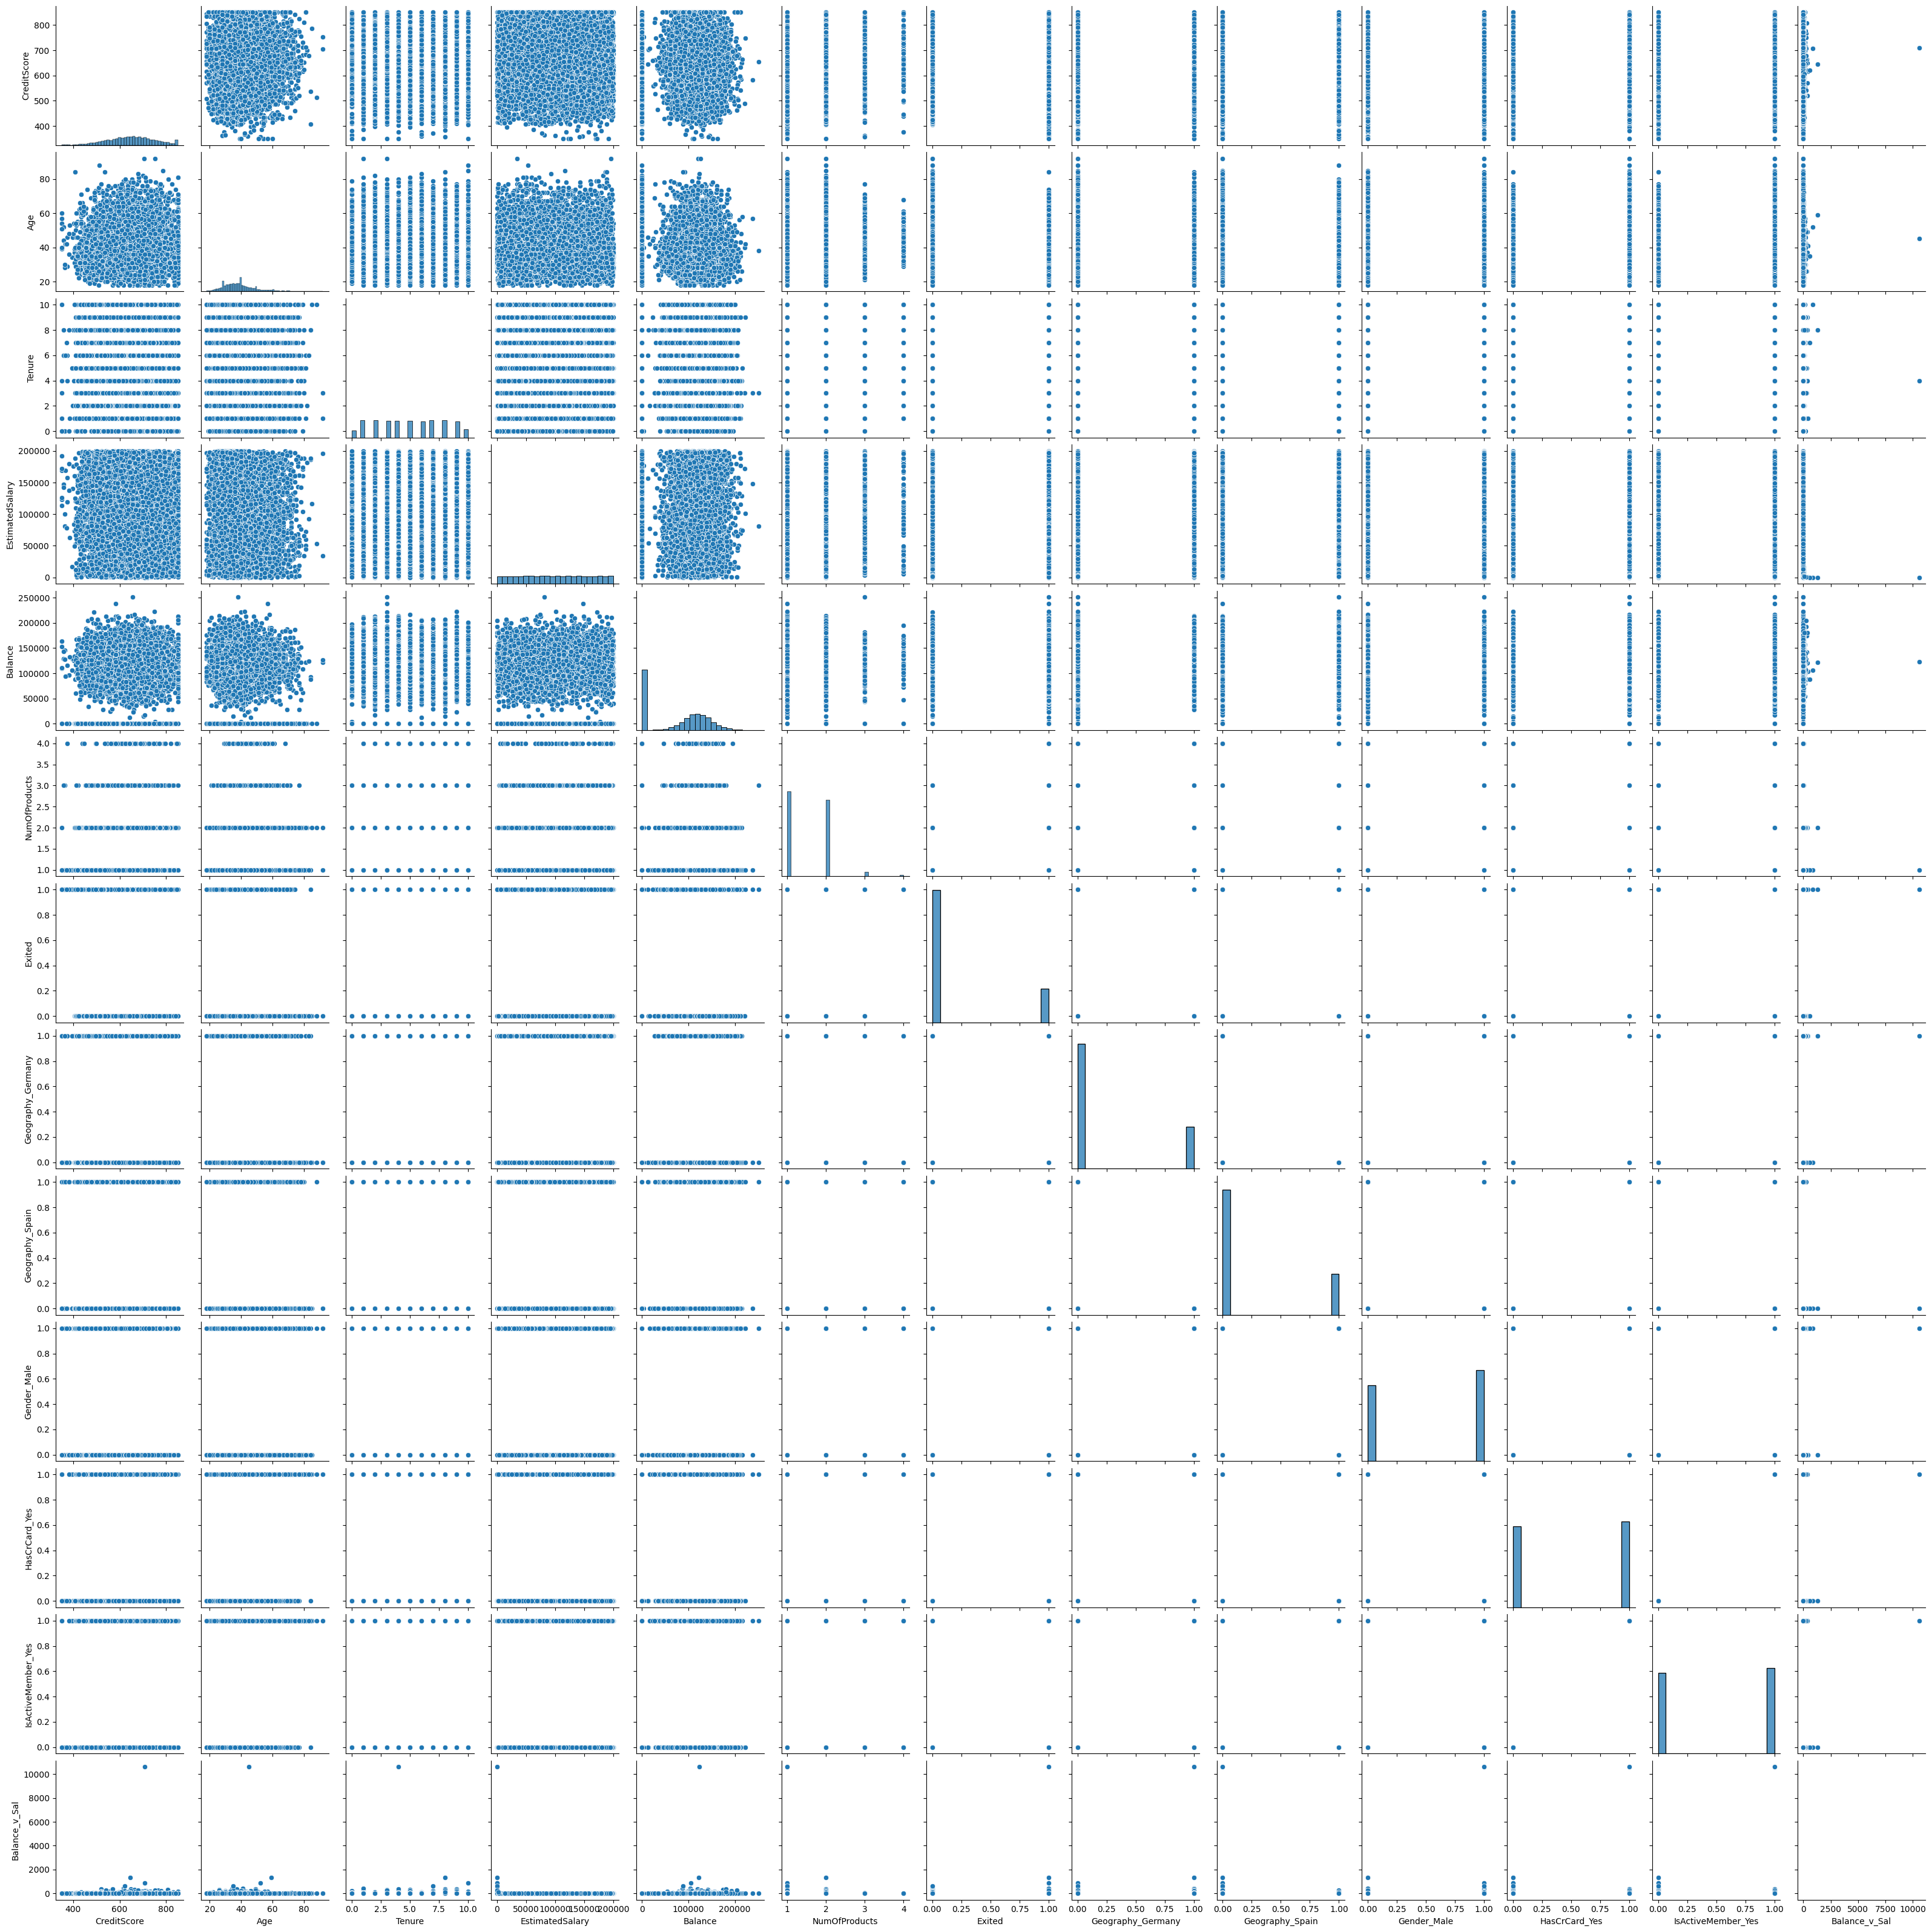

In [ ]:
#Let's check if there's any potential multicollinearity through pairplot
#sns.pairplot(modelling_df.select_dtypes(include=['number'])) #That's with all the variables

# Create the pairplot for numeric variables only
numeric_cols = modelling_df.select_dtypes(include=['number']).columns
sns.pairplot(modelling_df[numeric_cols])
plt.show()

#Check if we can find any pattern between two features

<Axes: >

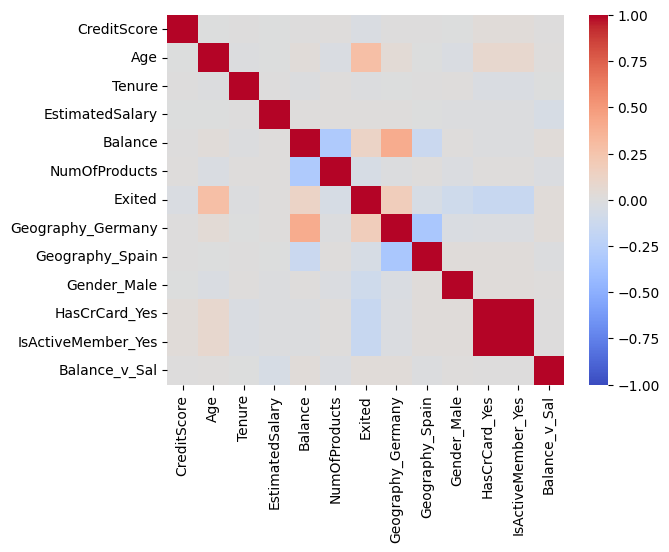

In [ ]:
sns.heatmap(modelling_df.corr(numeric_only = True), vmin = -1, vmax =1, cmap = "coolwarm")

## **Objective 2: More Feature Engineering & Train-Test Split**

Our second objective is to prepare the data for modeling through feature selection, feature engineering, and data splitting.

*   Create a new column, “income_v_products”, by dividing “EstimatedSalary” by “NumOfProducts”.

*   Split the data into train and test sets, with 20% of the rows in the test set.




In [88]:
modelling_df["income_v_product"] = modelling_df["EstimatedSalary"] / modelling_df["NumOfProducts"]
modelling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_Sal,income_v_product
0,619,42.0,2,101348.88,0.00,1,1,0,0,0,1,1,0.000000,101348.880
2,608,41.0,1,112542.58,83807.86,1,0,0,1,0,1,1,0.744677,112542.580
3,502,42.0,8,113931.57,159660.80,3,1,0,0,0,0,0,1.401375,37977.190
4,699,39.0,1,93826.63,0.00,2,0,0,0,0,0,0,0.000000,46913.315
5,850,43.0,2,79084.10,125510.82,1,0,0,1,0,1,1,1.587055,79084.100


<Axes: xlabel='Exited', ylabel='income_v_product'>

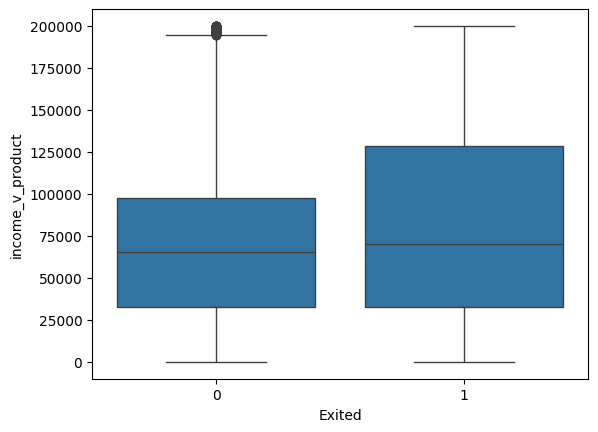

In [89]:
sns.boxplot(modelling_df, x = "Exited", y= "income_v_product")

In [90]:
# Now, we will spilt our data into Train and Test Set

from sklearn.model_selection import train_test_split
X = modelling_df.drop("Exited", axis = 1)
y = modelling_df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9255 to 7271
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8000 non-null   int64  
 1   Age                 8000 non-null   float64
 2   Tenure              8000 non-null   int64  
 3   EstimatedSalary     8000 non-null   float64
 4   Balance             8000 non-null   float64
 5   NumOfProducts       8000 non-null   int64  
 6   Geography_Germany   8000 non-null   int64  
 7   Geography_Spain     8000 non-null   int64  
 8   Gender_Male         8000 non-null   int64  
 9   HasCrCard_Yes       8000 non-null   int64  
 10  IsActiveMember_Yes  8000 non-null   int64  
 11  Balance_v_Sal       8000 non-null   float64
 12  income_v_product    8000 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 875.0 KB


In [91]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 6253 to 6930
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         2000 non-null   int64  
 1   Age                 2000 non-null   float64
 2   Tenure              2000 non-null   int64  
 3   EstimatedSalary     2000 non-null   float64
 4   Balance             2000 non-null   float64
 5   NumOfProducts       2000 non-null   int64  
 6   Geography_Germany   2000 non-null   int64  
 7   Geography_Spain     2000 non-null   int64  
 8   Gender_Male         2000 non-null   int64  
 9   HasCrCard_Yes       2000 non-null   int64  
 10  IsActiveMember_Yes  2000 non-null   int64  
 11  Balance_v_Sal       2000 non-null   float64
 12  income_v_product    2000 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 218.8 KB


##**Objective 3: Build & Evaluate a Logistic Regression Model**

Our third objective is to Fit a Logistic Regression Model and Evaluate it by using a Confusion Matrix, ROC Curve, and Precision & Recall:

* Fit a logistic regression model on our training data.

* Build a confusion matrix to evaluate our model.

* Calculate accuracy, precision, recall, and F1 for our test data.

* Plot an ROC curve and calculate the AUC statistic.

* Plot precision and recall against the model threshold (set the threshold to the value where recall is the highest, but precision is still above 50%).


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve

In [95]:
logreg = LogisticRegression()

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Train Accuracy: 0.787625
Test Accuracy: 0.802


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
logreg = LogisticRegression(max_iter = 100000)

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Train Accuracy: 0.813125
Test Accuracy: 0.817


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


See, the accuracy has increased!

In [97]:
confusion_matrix(y_train, lr.predict(X_train))

array([[6078,  278],
       [1217,  427]])

In [98]:
print(f"Train Accuracy: {lr.score(X_train, y_train)}")

Train Accuracy: 0.813125


**Precision is the proportion of all the model's positive classifications that are actually positive.** It is mathematically defined as:

Precision = TP / (TP + FP)

TP = True positives

FP = False Positives

In [ ]:
precision_score(y_train, lr.predict(X_train))

0.6056737588652482

**A recall score is a metric that measures how well a machine learning model identifies positive instances in a dataset.** It's calculated by dividing the number of true positives by the total number of positive samples:

Recall = TP / (TP + FN)

TP = True positives

FN = False negatives

In [ ]:
recall_score(y_train, lr.predict(X_train))

0.2597323600973236

In [ ]:
#Let''s check the Coefficients of the Model to find which Features have how much impact on our Target Variable
list(zip(X_train, lr.coef_[0]))

[('CreditScore', -0.0018509975207383596),
 ('Age', 0.067661213592624),
 ('Tenure', -0.019426647984932818),
 ('EstimatedSalary', -1.3393875318030584e-05),
 ('Balance', 1.0410822016831191e-06),
 ('NumOfProducts', 0.4497400901816476),
 ('Geography_Germany', 1.0187777578078192),
 ('Geography_Spain', 0.20788284653183525),
 ('Gender_Male', -0.8175534310848156),
 ('HasCrCard_Yes', -0.5210868109503852),
 ('IsActiveMember_Yes', -0.5210868109503852),
 ('Balance_v_Sal', 0.0006425218903702649),
 ('income_v_product', 1.6869202703094087e-05)]

In [ ]:
# Let's calculate the Accuracy Metrics for Test Data
confusion_matrix(y_test, lr.predict(X_test))

array([[1539,   68],
       [ 298,   95]])

In [ ]:
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Test Accuracy: 0.817


Accuracy didn't drop; hence, no over-fitting.

In [ ]:
precision_score(y_test, lr.predict(X_test))

0.5828220858895705

In [ ]:
recall_score(y_test, lr.predict(X_test))

0.24173027989821882

Didn't drop much.

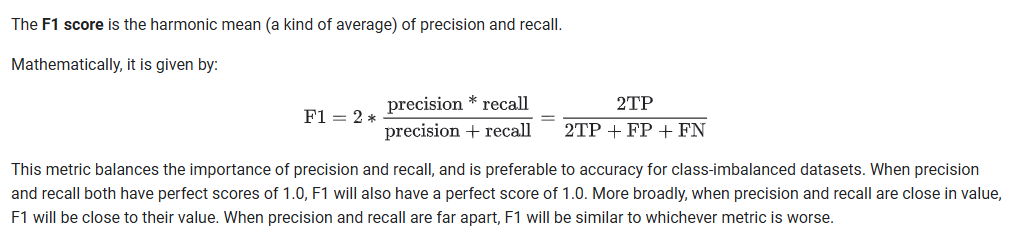

In [ ]:
f1_score(y_test, lr.predict(X_test))

0.34172661870503596

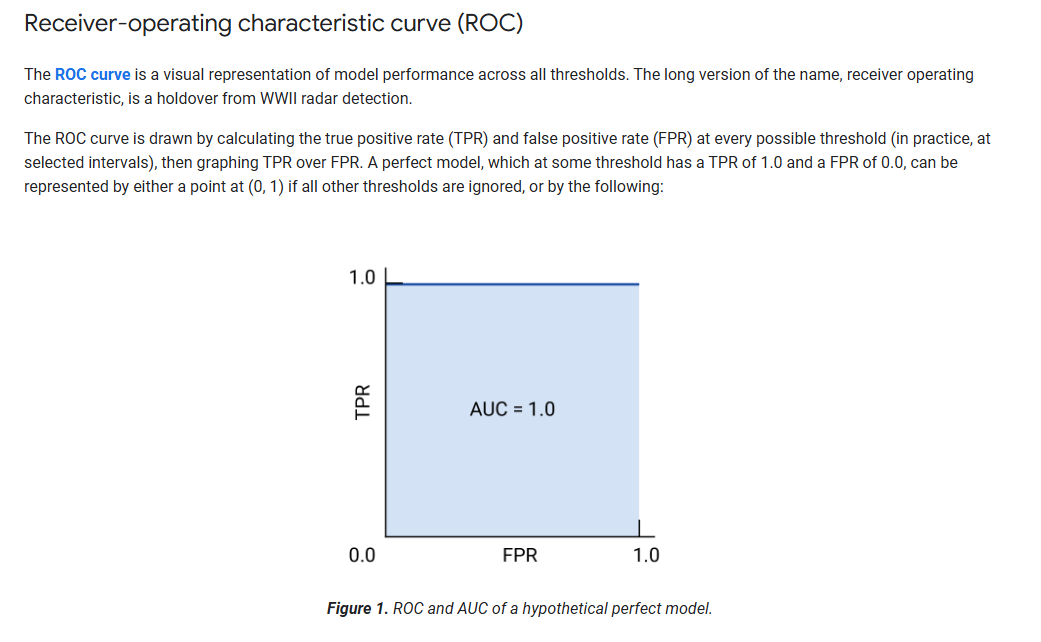

**Area under the curve (AUC):**

The area under the ROC curve (AUC) represents the probability that the model, if given a randomly chosen positive and negative example, will rank the positive higher than the negative.

The perfect model above, containing a square with sides of length 1, has an area under the curve (AUC) of 1.0. This means there is a 100% probability that the model will correctly rank a randomly chosen positive example higher than a randomly chosen negative example.

***In more concrete terms, a spam classifier with AUC of 1.0 always assigns a random spam email a higher probability of being spam than a random legitimate email. The actual classification of each email depends on the threshold that you choose.***

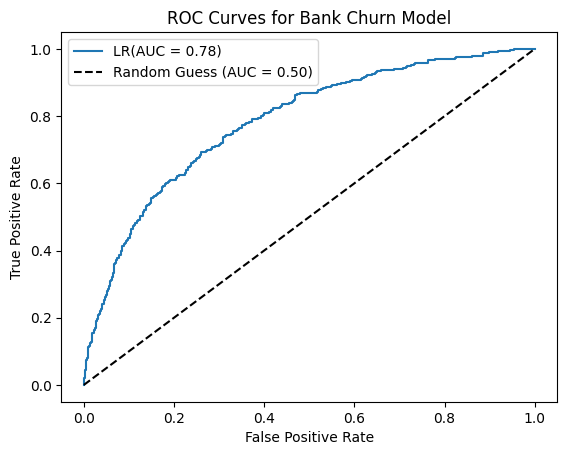

In [ ]:
y_probs = lr.predict_proba(X_test)[:, 1]
fpr1, tpr1, tresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr1, tpr1)

# Plot the ROC Curve
plt.plot(fpr1, tpr1, label = f'LR(AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0,1], [0,1], 'k--', label = 'Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Bank Churn Model')
plt.legend()
plt.show()


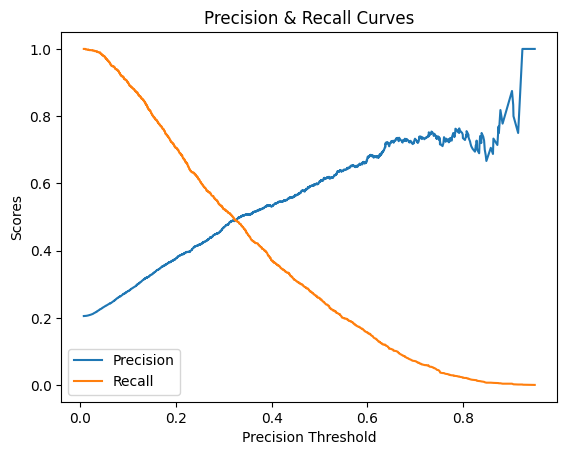

In [ ]:
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:, 1])

plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
plt.xlabel('Precision Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision & Recall Curves')
plt.show()

So, our is to find the point for Precision stays above 0.5 while maximizing our Recall. So, at the intersection point the Recall is about 50%, in another word, **we are going to capture 50% of our Churners**.

In [ ]:
np.where(p_curve >0.5)

(array([6425, 6427, 6428, ..., 7998, 7999, 8000]),)

In [ ]:
t_curve[6377]

0.3276686494326214

In [ ]:
confusion_matrix(y_test, lr.predict_proba(X_test)[:,1]> 0.34)

array([[1424,  183],
       [ 204,  189]])

In [ ]:
recall_score(y_test, lr.predict_proba(X_test)[:,1]> 0.34)

0.48091603053435117

A big jump from our initial Recall Score. But, it's going to be lower for Precision Score.

In [ ]:
precision_score(y_test, lr.predict_proba(X_test)[:,1]> 0.34)

0.5080645161290323

##**Objective 4: Fit & Tune a Random Forest Model**

Our final objective is to fit a random forest model, tune it using cross validation, and evaluate test accuracy, AUC score, and feature importance:

* Fit a random forest model with default hyperparameters.

* Use cross validation to tune your model's hyperparameters.

* Report the final test accuracy and AUC score.

* Build a bar chart that shows feature importance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf = rf.fit(X_train, y_train)

print(f"Train Accuracy: {rf.score(X_train, y_train)}")
print(f"Test Accuracy: {rf.score(X_test, y_test)}")

Train Accuracy: 1.0
Test Accuracy: 0.866


**Random Forest is extremely overfit.**

**Hyperparameter Tuning:**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state = 24, n_jobs = -1)

params = {
    'n_estimators': [100, 300, 500, 700, 800],
    'max_features': ["sqrt"],
    'bootstrap': [True],
    'max_samples': [None, 0.5],
    'max_depth': [5, 7, 9],
    'min_samples_leaf': [5, 10, 20],
}

grid = RandomizedSearchCV(
    rf,
    params,
    n_iter = 50,
    scoring = "accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

{'n_estimators': 800,
 'min_samples_leaf': 10,
 'max_samples': None,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': True}

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': np.arange(start = 700, stop = 1000, step = 100),
    'min_samples_leaf': [8, 10, 12],
    'max_samples': [None, .3],
    'max_features': ["sqrt"],
    'max_depth': np.arange(start = 8, stop = 10, step = 1),
    'bootstrap': [True]
}

grid = GridSearchCV(
    rf,
    params,
    scoring = "accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_samples': None,
 'min_samples_leaf': 10,
 'n_estimators': 900}

In [ ]:
rf = RandomForestClassifier(**{
    'n_estimators': 900,
    'min_samples_leaf': 10,
    'max_samples': None,
    'max_features': "sqrt",
    'max_depth': 9,
    'bootstrap': True}
)

rf = rf.fit(X_train, y_train)

print(f"Train Accuracy: {rf.score(X_train, y_train)}")
print(f"Test Accuracy: {rf.score(X_test, y_test)}")

Train Accuracy: 0.874125
Test Accuracy: 0.8605


In [ ]:
y_probs = rf.predict_proba(X_test)[:, 1]
fpr1, tpr1, tresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr1, tpr1)

auc_score

0.8697524032105087

**Feature Importance:**

<Axes: xlabel='Importance', ylabel='Features'>

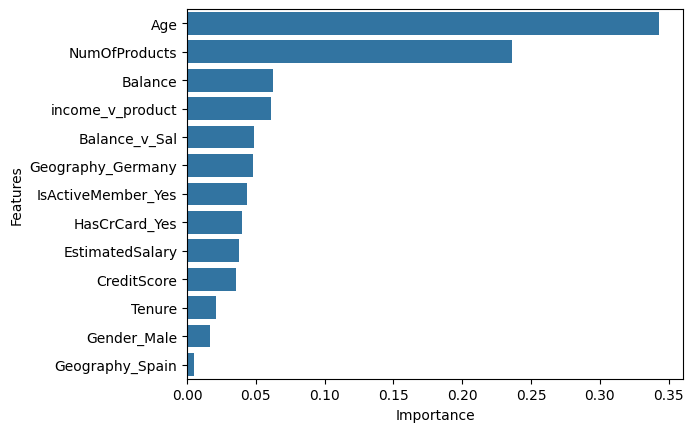

In [ ]:
importance = pd.DataFrame(
    {"Features": X_train.columns,
     "Importance": rf.feature_importances_}
).sort_values(by = "Importance", ascending = False).iloc[:20]

sns.barplot(x = "Importance", y = "Features", data = importance)

So, Age is the most influential Feature; Apart from that Number of Products, Balance, Geography of Germany, Active Member and some of our Engineered Features were found Important.

While Gender, Tenure, Credit Score do not impact Churning Status that much.